In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=7, random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])

In [3]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [34]:
from numpy import loadtxt
from xgboost import XGBClassifier, Booster, DMatrix
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
# split data into X and y

# fit model no training data
model = XGBClassifier(n_estimators=5)
model.fit(X, y)
# plot single tree
#plot_tree(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=5, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

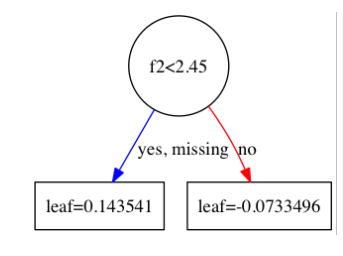

In [35]:
plot_tree(model, num_trees=0)

In [36]:
model.booster().get_dump()[1]

'0:[f2<2.45] yes=1,no=2,missing=1\n\t1:leaf=-0.0717703\n\t2:[f3<1.75] yes=3,no=4,missing=3\n\t\t3:[f2<4.95] yes=5,no=6,missing=5\n\t\t\t5:leaf=0.138806\n\t\t\t6:leaf=-3.25116e-09\n\t\t4:[f2<4.85] yes=7,no=8,missing=7\n\t\t\t7:leaf=-2.55448e-09\n\t\t\t8:leaf=-0.0712707\n'

In [37]:
trees = model.booster().predict(DMatrix(X_test), pred_leaf = True)

In [38]:
np.array(trees).shape

(38, 15)